In [1]:
# !pip install pandas
# !pip install seaborn
# !pip install sklearn

In [2]:
import pandas as pd

teams = pd.read_csv("teams.csv")
teams = teams[["team","country","year","athletes","age","prev_medals","medals"]] #Trimming the columns
print (teams)

     team      country  year  athletes   age  prev_medals  medals
0     AFG  Afghanistan  1964         8  22.0          0.0       0
1     AFG  Afghanistan  1968         5  23.2          0.0       0
2     AFG  Afghanistan  1972         8  29.0          0.0       0
3     AFG  Afghanistan  1980        11  23.6          0.0       0
4     AFG  Afghanistan  2004         5  18.6          0.0       0
...   ...          ...   ...       ...   ...          ...     ...
2139  ZIM     Zimbabwe  2000        26  25.0          0.0       0
2140  ZIM     Zimbabwe  2004        14  25.1          0.0       3
2141  ZIM     Zimbabwe  2008        16  26.1          3.0       4
2142  ZIM     Zimbabwe  2012         9  27.3          4.0       0
2143  ZIM     Zimbabwe  2016        31  27.5          0.0       0

[2144 rows x 7 columns]


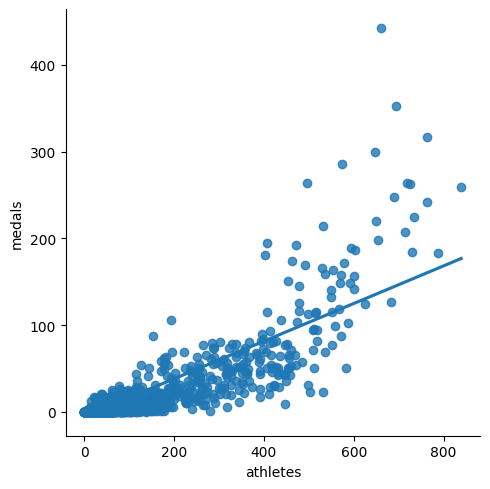

In [3]:
import seaborn as sns
sns.lmplot(x="athletes", y="medals", data=teams, fit_reg=True, ci=None)

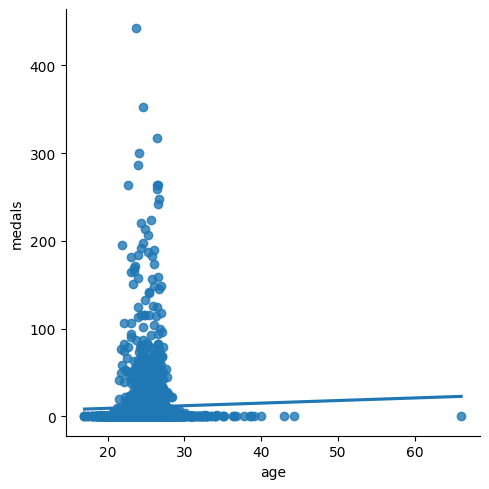

In [5]:
sns.lmplot(x="age", y="medals", data=teams, fit_reg=True, ci=None)


In [6]:
teams = teams.dropna()
teams.corr()

ValueError: could not convert string to float: 'AFG'

In [7]:
train = teams[teams["year"] < 2012].copy()
test = teams[teams["year"] >= 2012].copy()

### Creates two new datasets from the main one. One is to train the model and the other is to evaluate it. Data is split with respect to time. Training size : testing size ~ 80:20

In [ ]:
#print(test.shape) to see shape of any dataframe

In [ ]:

from sklearn.linear_model import LinearRegression


In [ ]:
predictors = ["athletes", "prev_medals"]
target_data = "medals"

### Picks which data to use in the model and which data to predict

In [ ]:
reg = LinearRegression()
reg.fit(train[predictors], train[target_data])

In [ ]:
predictions = reg.predict(test[predictors])
test["predictions"] = predictions
test.loc[test["predictions"] <0, "predictions"] = 0
test["predictions"] = test["predictions"].round()


Removes all negative values and rounds all decimal values 

In [ ]:
print(test)

# Finding error

In [ ]:
from sklearn.metrics import mean_absolute_error
error = mean_absolute_error(test["medals"], test["predictions"])
print (error)
                        

In [ ]:
teams.describe()["medals"]

In [ ]:
print(test[test["team"]=="USA"])